# Topic 2 Models

---

In [1]:
#Import the relevant packages
import numpy as np
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

##### Faking up the data

In [2]:
weight = np.arange(0.0, 21.0, 1.0) #indepandant variable from 0-21 in steps of 1. (not including 21)
depend = 5.0 * weight + 10.0 + np.random.normal(0.0, 5.0, weight.size) #dependant variable that is 5times the weight and add 10 plus noise std of 5 centered around 0  

In [3]:
weight #looking at the weight data set

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [4]:
depend #looking at the depend data set

array([  3.82698599,  18.42292754,  14.55179571,  22.86536069,
        35.94973069,  39.14369707,  41.35584085,  46.95430604,
        51.77900634,  59.81345613,  67.36735047,  57.08964532,
        62.48739314,  70.59458479,  79.8297143 ,  87.09946134,
        94.62200847,  93.58051972, 100.3710938 , 104.0539191 ,
       117.61648093])

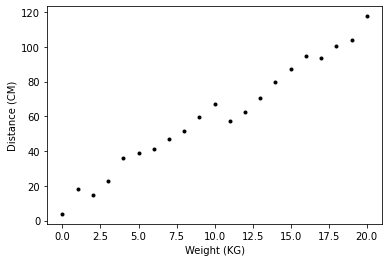

In [5]:
plt.plot(weight, depend, 'k.') #plotting the weight v depend variables

# Set some properties for the plot.
plt.xlabel('Weight (KG)') #naming the x label
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

#### We can say that the this can be deemed as a Linear Model ie most of the points would fit on the straight line. The ones that are off we can say it was due to error example air density or the measuring tape is off.

#### For straight lines we can express it as y =mx + c

##### m is the slope, the slope is how much y increased when x is incresed by 1

##### c is the intecept of the line, 

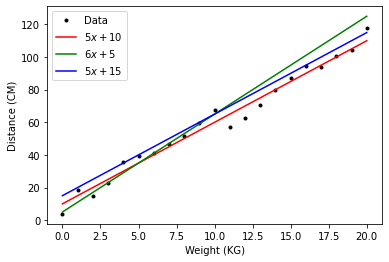

In [6]:
plt.plot(weight, depend, 'k.', label="Data")#Plotting weight versus depend k is calling the black dots.


x = np.arange(0.0, 21.0, 1.0) #from 0-21 not including 21 going up in 1s
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$") #Overlay the red lines on the plot.
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")#Overlay the green lines on the plot.
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")#Overlay the blue lines on the plot.


plt.legend() #add the legend


plt.xlabel('Weight (KG)') #naming the xlable
plt.ylabel('Distance (CM)') #naming the ylable


plt.show() #calling the plot

## Cost Function/ Formula

---

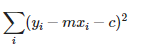

#### Big E is sigma means sum, i is ilerate through each point. Difference between y and what the y line value should be given x. Then square it. We are trying to evaluate m and c given x and y.

In [7]:
cost = lambda m,c: np.sum([(depend[i] - m * weight[i] - c)**2 for i in range(weight.size)]) #Calc the cost of the data points to the line

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0))) #red line
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0))) #green line
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0))) #blue line

Cost with m =  5.00 and c = 10.00:   448.18
Cost with m =  6.00 and c =  5.00:  1498.52
Cost with m =  5.00 and c = 15.00:   879.43


## Minimising the Cost

---

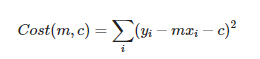

#### Trying to get the cost as low as possible. 

In [8]:
# Calculate the best values for m and c.

w_avg = np.mean(weight) #First calculate the means (a.k.a. averages) of w and d.
d_avg = np.mean(depend) #Average of d

w_zero = weight - w_avg #Subtract the average from w 
d_zero = depend - d_avg #Subtract the average from d

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero) #sum of w_zero multiply by d_zero Divide by the sum of w_zero by w_zero

c = d_avg - m * w_avg # Use m from above to calculate the best c.

print("M is %8.6f and C is %6.6f." % (m, c))

M is 5.097995 and C is 9.466492.


#### This also can be found using numpy called the polyfit

In [9]:
np.polyfit(weight, depend, 1) #Numbers are the same as above for m and c


array([5.097995 , 9.4664918])

#### Best Fit Line

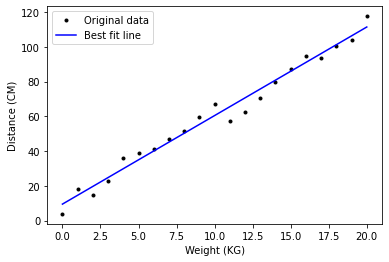

In [10]:
# Plot the best fit line.
plt.plot(weight, depend, 'k.', label='Original data')
plt.plot(weight, m * weight + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# Show the plot.
plt.show()

In [11]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c))) #was 5 and 10 but the noise has had an effect


Cost with m =  5.10 and c =  9.47:   436.60


#### Excercise 1: Use numpy and matplotlib to plot the absolute value function.

#### Research and explain why the absolute value function is not typically used in fitting straight lines to data.

---

##### The absolute value function is commonly used to determine the distance between two numbers on the number line. Given two values a and b, then  |a−b|  will give the distance, a positive quantity, between these values, regardless of which value is larger (Lippman et al., 2022)


###### When we have a scatterplot showing the relationship between x and y. We use a line to determine which is best to use. The best line will be one that is “closest” to the points on the scatterplot ie the smallest distance between the points and the line. We can measure this distance Horizontal, Perpendicular or Verticle. From there, we sum up all the distances. 

##### A faster way to do this is use the formula. When using the formula the errors can come out negative or positive and with a + and - they cancel each other out. When we manually do it we assume the errors are always positive whether it above or below the line. In order to make the errors positive we could use the absolute values. Therefore we can add all of them with out fear of them cancelling each other out. 

#### In essense, we are trying to find a line that minimises the formula. To do this we use Calculus to find min or max of a formula. However absolute values are hard to work with in Maths. Using absolute values requires to  go through the entire process of drawing regression lines, measuring the error distances, and summing the errors. 

#### Therfore we use square root the in the formula to make it positive. When we do not square all the values in the numerator, the positive and negative values cancel each other out and we are always left with a value of 0. 

##### Taken and adapted from https://www.bradthiessen.com/html5/docs/ols.pdf and https://math.libretexts.org/Bookshelves/Precalculus/Book%3A_Precalculus__An_Investigation_of_Functions_(Lippman_and_Rasmussen)/02%3A_Linear_Functions/205%3A_Absolute_Value_Functions